In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
def step(u_ns, v_ns, tau, N, a, b, c, c_stable = 0):
    '''
    Computes one iteration of the forward Euler time-stepping scheme for the 1D wave equation with(out) a
    stabilization term as a system of first-order PDEs.
    
    inputs:
        -  u_ns: a list of scalars representing the approximate solution to u for the n-th snapshot time
        -  v_ns: a list of scalars representing the approximate solution to v for the n-th snapshot time
        -  tau: a positive real number representing the time step size
        -  N: a positive integer representing the division of the domain into subintervals
        -  a: a scalar representing the left endpoint of the domain
        -  b: a scalar representing the right endpoint of the domain
        -  c: a scalar representing the wave speed
        -  c_stable: a real number between 1 and 32 used in the stabilization term
    
    returns:
        -  a list of scalars representing the approximate solution to u for the (n + 1)-th snapshot time
        -  a list of scalars representing the approximate solution to v for the (n + 1)-th snapshot time
    '''
    # discretization
    h = (b - a) / (N + 1)
    xs = [a + i * h for i in range(N + 2)]
    
    # approximate solutions for the n-th snapshot time
    u_ns_copy = u_ns.copy()
    v_ns_copy = v_ns.copy()
    
    # approximate solutions for the (n + 1)-th snapshot time
    u_np1s = np.zeros(N + 2)
    v_np1s = np.zeros(N + 2)
    
    # advance in time
    for i in range(1, N + 1):
        u_np1s[i] = (u_ns_copy[i] - (tau / (2 * h)) * (v_ns_copy[i + 1] - v_ns_copy[i - 1]) 
                     + tau * c_stable * (u_ns_copy[i + 1] - 2 * u_ns_copy[i] + u_ns_copy[i - 1]))
        v_np1s[i] = (v_ns_copy[i] - ((tau * (c ** 2)) / (2 * h)) * (u_ns_copy[i + 1] - u_ns_copy[i - 1]) 
                     + tau * c_stable * (v_ns_copy[i + 1] - 2 * v_ns_copy[i] + v_ns_copy[i - 1]))
    u_np1s[0] = u_ns_copy[0] - (tau / h) * (v_ns_copy[1] - v_ns_copy[0])
    v_np1s[0] = v_ns_copy[0] - ((tau * (c ** 2)) / h) * (u_ns_copy[1] - u_ns_copy[0])
    u_np1s[-1] = u_ns_copy[-1] - (tau / h) * (v_ns_copy[-1] - v_ns_copy[N])
    v_np1s[-1] = v_ns_copy[-1] - ((tau * (c ** 2)) / h) * (u_ns_copy[-1] - u_ns_copy[N])
    
    return u_np1s, v_np1s

In [3]:
def solve(u0, v0, tau, T, N, a, b, c, c_stable = 0, reflecting = False):
    '''
    Solves the 1D wave equation with(out) a stabilization term as a system of first-order PDEs using the
    forward Euler time-stepping scheme with central differences for the interior and one-sided differences
    for the endpoints.
    
    inputs:
        -  u0: a function that maps from the domain to the real numbers representing the initial condition for u
        -  v0: a function that maps from the domain to the real numbers representing the initial condition for v
        -  tau: a positive real number representing the time step size
        -  T: a positive real number representing the final time
        -  N: a positive integer representing the division of the domain into subintervals
        -  a: a scalar representing the left endpoint of the domain
        -  b: a scalar representing the right endpoint of the domain
        -  c: a scalar representing the wave speed
        -  c_stable: a real number between 1 and 32 used in the stabilization term
        -  reflecting: a Boolean representing the inclusion/exclusion of reflecting boundaries
    
    returns:
        -  None
    '''
    # discretization
    h = (b - a) / (N + 1)
    xs = [a + i * h for i in range(N + 2)]
    
    # approximate solutions for the n-th snapshot time
    u = [u0(x) for x in xs]
    v = [v0(x) for x in xs]
    
    # plots the approximate solution to u over time
    plt.ion()
    o_g = 0.1
    o_c = 0
    t = 0
    while t < T:
        t += tau
        if o_g * o_c < t:
            clear_output(wait = True)
            o_c += 1
            plt.plot(xs, u)
            plt.ylim(0.75, 2.25)
            plt.show()
        u, v = step(u, v, tau, N, a, b, c, c_stable)
        if reflecting == True:
            v[0] = 0
            v[-1] = 0

In [4]:
def u_example(x):
    return 1 + np.exp(-8 * ((x - 2) ** 2))

def v_example(x):
    return 0

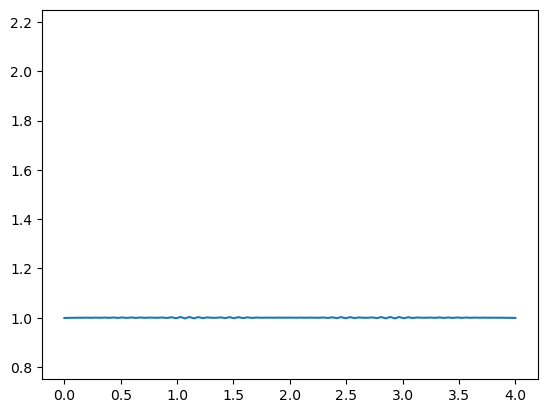

In [5]:
# no stabilization term and no reflecting boundaries
a = 0
b = 4
c = 0.1
N = 100
h = (b - a) / (N + 1)
tau = 0.1 * h
T = 50
solve(u_example, v_example, tau, T, N, a, b, c)

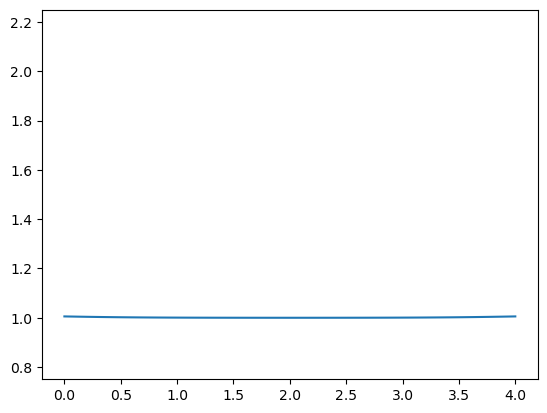

In [6]:
# stabilization term
a = 0
b = 4
c = 0.1
c_stable = 10
N = 100
h = (b - a) / (N + 1)
tau = 0.1 * h
T = 50
solve(u_example, v_example, tau, T, N, a, b, c, c_stable)

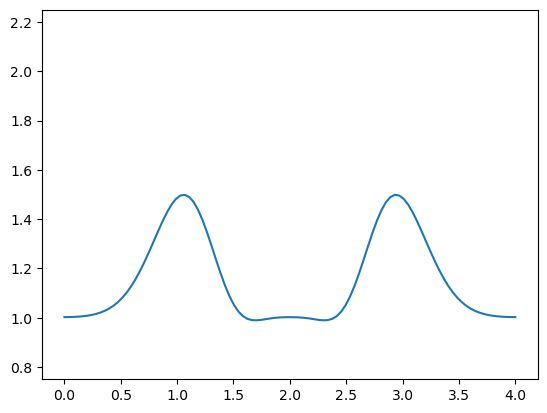

In [7]:
# reflecting boundaries
a = 0
b = 4
c = 0.1
N = 100
h = (b - a) / (N + 1)
tau = 0.1 * h
T = 50
reflecting = True
solve(u_example, v_example, tau, T, N, a, b, c, 0, reflecting)

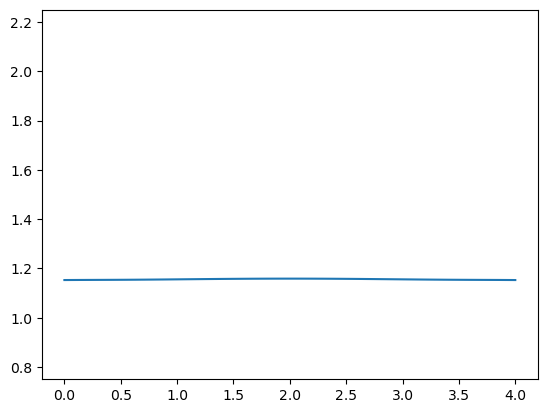

In [8]:
# stabilization term and reflecting boundaries
a = 0
b = 4
c = 0.1
c_stable = 10
N = 100
h = (b - a) / (N + 1)
tau = 0.1 * h
T = 50
reflecting = True
solve(u_example, v_example, tau, T, N, a, b, c, c_stable, reflecting)

In [9]:
def step_nonlinear(u_ns, v_ns, tau, N, a, b, c):
    '''
    Computes one iteration of the forward Euler time-stepping scheme for the nonlinear PDE as a system of
    first-order PDEs.
    
    inputs:
        -  u_ns: a list of scalars representing the approximate solution to u for the n-th snapshot time
        -  v_ns: a list of scalars representing the approximate solution to v for the n-th snapshot time
        -  tau: a positive real number representing the time step size
        -  N: a positive integer representing the division of the domain into subintervals
        -  a: a scalar representing the left endpoint of the domain
        -  b: a scalar representing the right endpoint of the domain
        -  c: a scalar representing the wave speed
    
    returns:
        -  a list of scalars representing the approximate solution to u for the (n + 1)-th snapshot time
        -  a list of scalars representing the approximate solution to v for the (n + 1)-th snapshot time
    '''
    # discretization
    h = (b - a) / (N + 1)
    xs = [a + i * h for i in range(N + 2)]
    
    # approximate solutions for the n-th snapshot time
    u_ns_copy = u_ns.copy()
    v_ns_copy = v_ns.copy()
    
    # approximate solutions for the (n + 1)-th snapshot time
    u_np1s = np.zeros(N + 2)
    v_np1s = np.zeros(N + 2)
    
    # advance in time
    for i in range(1, N + 1):
        u_np1s[i] = u_ns_copy[i] - (tau / (2 * h)) * (v_ns_copy[i + 1] - v_ns_copy[i - 1])
        v_np1s[i] = (v_ns_copy[i] - ((tau * (c ** 2)) / (2 * h)) * (u_ns_copy[i + 1] - u_ns_copy[i - 1]) 
                     * (1 + (u_ns_copy[i + 1] - u_ns_copy[i - 1])) 
                     * (1 + (1 / 2) * (u_ns_copy[i + 1] - u_ns_copy[i - 1])))
    u_np1s[0] = u_ns_copy[0] - (tau / h) * (v_ns_copy[1] - v_ns_copy[0])
    v_np1s[0] = (v_ns_copy[0] - ((tau * (c ** 2)) / h) * (u_ns_copy[1] - u_ns_copy[0]) 
                 * (1 + (u_ns_copy[1] - u_ns_copy[0])) * (1 + (1 / 2) * (u_ns_copy[1] - u_ns_copy[0])))
    u_np1s[-1] = u_ns_copy[-1] - (tau / h) * (v_ns_copy[-1] - v_ns_copy[N])
    v_np1s[-1] = (v_ns_copy[-1] - ((tau * (c ** 2)) / h) * (u_ns_copy[-1] - u_ns_copy[N]) 
                  * (1 + (u_ns_copy[-1] - u_ns_copy[N])) * (1 + (1 / 2) * (u_ns_copy[-1] - u_ns_copy[N])))
    
    return u_np1s, v_np1s

In [10]:
def solve_nonlinear(u0, v0, tau, T, N, a, b, c):
    '''
    Solves the nonlinear PDE as a system of first-order PDEs using the forward Euler time-stepping scheme
    with central differences for the interior and one-sided differences for the endpoints.
    
    inputs:
        -  u0: a function that maps from the domain to the real numbers representing the initial condition for u
        -  v0: a function that maps from the domain to the real numbers representing the initial condition for v
        -  tau: a positive real number representing the time step size
        -  T: a positive real number representing the final time
        -  N: a positive integer representing the division of the domain into subintervals
        -  a: a scalar representing the left endpoint of the domain
        -  b: a scalar representing the right endpoint of the domain
        -  c: a scalar representing the wave speed
    
    returns:
        -  None
    '''
    # discretization
    h = (b - a) / (N + 1)
    xs = [a + i * h for i in range(N + 2)]
    
    # approximate solutions for the n-th snapshot time
    u = [u0(x) for x in xs]
    v = [v0(x) for x in xs]
    
    # plots the approximate solution to u over time
    plt.ion()
    o_g = 0.1
    o_c = 0
    t = 0
    while t < T:
        t += tau
        if o_g * o_c < t:
            clear_output(wait = True)
            o_c += 1
            plt.plot(xs, u)
            plt.ylim(0.75, 2.25)
            plt.show()
        u, v = step_nonlinear(u, v, tau, N, a, b, c)

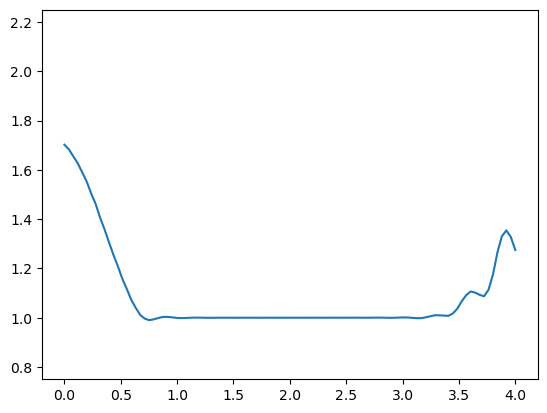

In [11]:
a = 0
b = 4
c = 0.1
N = 100
h = (b - a) / (N + 1)
tau = 0.1 * h
T = 20
solve_nonlinear(u_example, v_example, tau, T, N, a, b, c)

In [12]:
def step_linear_string(u_ns, v_ns, tau, N, a, b, c, c_stable, f):
    '''
    Computes one iteration of the forward Euler time-stepping scheme for the linear elastic string subject to
    gravity as a system of first-order PDEs.
    
    inputs:
        -  u_ns: a list of scalars representing the approximate solution to u for the n-th snapshot time
        -  v_ns: a list of scalars representing the approximate solution to v for the n-th snapshot time
        -  tau: a positive real number representing the time step size
        -  N: a positive integer representing the division of the domain into subintervals
        -  a: a scalar representing the left endpoint of the domain
        -  b: a scalar representing the right endpoint of the domain
        -  c: a scalar representing the wave speed
        -  c_stable: a real number between 1 and 32 used in the stabilization term
        -  f: a function that maps from the domain to the real numbers involving gravity
    
    returns:
        -  a list of scalars representing the approximate solution to u for the (n + 1)-th snapshot time
        -  a list of scalars representing the approximate solution to v for the (n + 1)-th snapshot time
    '''
    # discretization
    h = (b - a) / (N + 1)
    xs = [a + i * h for i in range(N + 2)]
    
    # approximate solutions for the n-th snapshot time
    u_ns_copy = u_ns.copy()
    v_ns_copy = v_ns.copy()
    
    # approximate solutions for the (n + 1)-th snapshot time
    u_np1s = np.zeros(N + 2)
    v_np1s = np.zeros(N + 2)
    
    # advance in time
    for i in range(1, N + 1):
        u_np1s[i] = (u_ns_copy[i] - (tau / (2 * h)) * (v_ns_copy[i + 1] - v_ns_copy[i - 1]) 
                     + tau * c_stable * (u_ns_copy[i + 1] - 2 * u_ns_copy[i] + u_ns_copy[i - 1]))
        v_np1s[i] = (v_ns_copy[i] - ((tau * (c ** 2)) / (2 * h)) * (u_ns_copy[i + 1] - u_ns_copy[i - 1]) 
                     + tau * c_stable * (v_ns_copy[i + 1] - 2 * v_ns_copy[i] + v_ns_copy[i - 1]) + tau * f(xs[i]))
    u_np1s[0] = u_ns_copy[0] - (tau / h) * (v_ns_copy[1] - v_ns_copy[0])
    v_np1s[0] = v_ns_copy[0] - ((tau * (c ** 2)) / h) * (u_ns_copy[1] - u_ns_copy[0]) + tau * f(xs[0])
    u_np1s[-1] = u_ns_copy[-1] - (tau / h) * (v_ns_copy[-1] - v_ns_copy[N])
    v_np1s[-1] = v_ns_copy[-1] - ((tau * (c ** 2)) / h) * (u_ns_copy[-1] - u_ns_copy[N]) + tau * f(xs[-1])
    
    return u_np1s, v_np1s

In [13]:
def step_nonlinear_string(u_ns, v_ns, tau, N, a, b, c, c_stable, f):
    '''
    Computes one iteration of the forward Euler time-stepping scheme for the nonlinear elastic string subject to
    gravity as a system of first-order PDEs.
    
    inputs:
        -  u_ns: a list of scalars representing the approximate solution to u for the n-th snapshot time
        -  v_ns: a list of scalars representing the approximate solution to v for the n-th snapshot time
        -  tau: a positive real number representing the time step size
        -  N: a positive integer representing the division of the domain into subintervals
        -  a: a scalar representing the left endpoint of the domain
        -  b: a scalar representing the right endpoint of the domain
        -  c: a scalar representing the wave speed
        -  c_stable: a real number between 1 and 32 used in the stabilization term
        -  f: a function that maps from the domain to the real numbers involving gravity
    
    returns:
        -  a list of scalars representing the approximate solution to u for the (n + 1)-th snapshot time
        -  a list of scalars representing the approximate solution to v for the (n + 1)-th snapshot time
    '''
    # discretization
    h = (b - a) / (N + 1)
    xs = [a + i * h for i in range(N + 2)]
    
    # approximate solutions for the n-th snapshot time
    u_ns_copy = u_ns.copy()
    v_ns_copy = v_ns.copy()
    
    # approximate solutions for the (n + 1)-th snapshot time
    u_np1s = np.zeros(N + 2)
    v_np1s = np.zeros(N + 2)
    
    # advance in time
    for i in range(1, N + 1):
        u_np1s[i] = (u_ns_copy[i] - (tau / (2 * h)) * (v_ns_copy[i + 1] - v_ns_copy[i - 1]) 
                     + tau * c_stable * (u_ns_copy[i + 1] - 2 * u_ns_copy[i] + u_ns_copy[i - 1]))
        v_np1s[i] = (v_ns_copy[i] - ((tau * (c ** 2)) / (2 * h)) * (u_ns_copy[i + 1] - u_ns_copy[i - 1]) 
                     * (1 + (u_ns_copy[i + 1] - u_ns_copy[i - 1])) 
                     * (1 + (1 / 2) * (u_ns_copy[i + 1] - u_ns_copy[i - 1]))
                     + tau * c_stable * (v_ns_copy[i + 1] - 2 * v_ns_copy[i] + v_ns_copy[i - 1]) + tau * f(xs[i]))
    u_np1s[0] = u_ns_copy[0] - (tau / h) * (v_ns_copy[1] - v_ns_copy[0])
    v_np1s[0] = (v_ns_copy[0] - ((tau * (c ** 2)) / h) * (u_ns_copy[1] - u_ns_copy[0]) 
                 * (1 + (u_ns_copy[1] - u_ns_copy[0])) * (1 + (1 / 2) * (u_ns_copy[1] - u_ns_copy[0]))
                 + tau * f(xs[0]))
    u_np1s[-1] = u_ns_copy[-1] - (tau / h) * (v_ns_copy[-1] - v_ns_copy[N])
    v_np1s[-1] = (v_ns_copy[-1] - ((tau * (c ** 2)) / h) * (u_ns_copy[-1] - u_ns_copy[N]) 
                  * (1 + (u_ns_copy[-1] - u_ns_copy[N])) * (1 + (1 / 2) * (u_ns_copy[-1] - u_ns_copy[N]))
                  + tau * f(xs[-1]))
    
    return u_np1s, v_np1s

In [23]:
def solve_string(tau, T, N, a, b, c, c_stable, f):
    '''
    Solves the linear and nonlinear elastic strings subject to gravity as systems of first-order PDEs using the
    forward Euler time-stepping scheme with central differences for the interior and one-sided differences
    for the endpoints.
    
    inputs:
        -  tau: a positive real number representing the time step size
        -  T: a positive real number representing the final time
        -  N: a positive integer representing the division of the domain into subintervals
        -  a: a scalar representing the left endpoint of the domain
        -  b: a scalar representing the right endpoint of the domain
        -  c: a scalar representing the wave speed
        -  c_stable: a real number between 1 and 32 used in the stabilization term
        -  f: a function that maps from the domain to the real numbers involving gravity
    
    returns:
        -  None
    '''
    # discretization
    h = (b - a) / (N + 1)
    xs = [a + i * h for i in range(N + 2)]
    
    # approximate solutions for the n-th snapshot time
    u_linear = np.zeros(N + 2)
    v_linear = np.zeros(N + 2)
    u_nonlinear = np.zeros(N + 2)
    v_nonlinear = np.zeros(N + 2)
    
    # plots the approximate solution to u over time
    plt.ion()
    o_g = 0.1
    o_c = 0
    t = 0
    while t < T:
        t += tau
        if o_g * o_c < t:
            clear_output(wait = True)
            o_c += 1
            plt.plot(xs, u_linear, label = 'Linear')
            plt.plot(xs, u_nonlinear, label = 'Nonlinear')
            plt.ylim(0, 0.11)
            plt.legend(loc = 'upper left')
            plt.show()
        u_linear, v_linear = step_linear_string(u_linear, v_linear, tau, N, a, b, c, c_stable, f)
        u_nonlinear, v_nonlinear = step_nonlinear_string(u_nonlinear, v_nonlinear, tau, N, a, b, c, c_stable, f)
        u_linear[0] = 0
        u_linear[-1] = u_linear[-2]
        u_nonlinear[0] = 0
        u_nonlinear[-1] = u_nonlinear[-2]

In [24]:
def f_example(x):
    return -0.1 * x - (1 / 2)

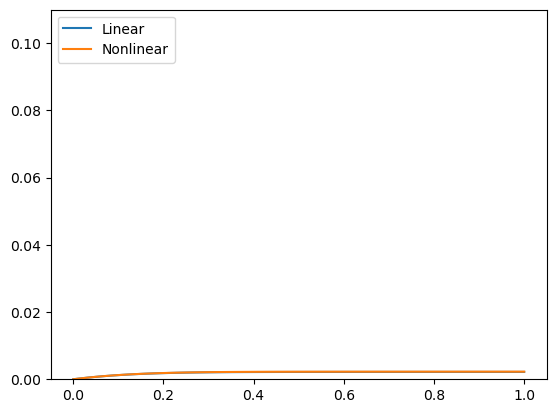

In [25]:
a = 0
b = 1
c = 1
c_stable = 16
N = 100
h = (b - a) / (N + 1)
tau = 0.1 * h
T = 20
solve_string(tau, T, N, a, b, c, c_stable, f_example)